# What to keep in mind while Job hunting as a Programmer?
This notebook accompnaies my [Medium artilce](https://omeradelez.medium.com/job-hunting-expectations-8ed1180d407d).It serves to showcase how did I reach the conculsions in the article.

I tried to apply the CRISP method when dealing with this dataset. however due to the fact that this was my frist real project. It didn't go as smoothly as I wanted it to be. Due to my inexperience I did through a few failed question or datasets but at the end went back to this dataset. After going through this sets these questions poped up:
1. traits that are most common between respondents and it's effect on salary? (Challenging one self, Problem solving, building things)

2. Correlation between traits and Type of education of the respondent?

3. What do respondents prioritize when looking for a job? ex(Job Dept., office environment, type of work)

4. What are the factors that are considered important when hiring according to the respondents? (Using open source, Experience, Communication)


I settled on the last two question for this articles and planning to try to solve the others when I gain more experience with data.

In [118]:
#Import necassary libraries.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

df=pd.read_csv('./survey_results_public.csv')
schema= pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1: What do companies look for when hiring candidates ?

To slove this question I used the section of the survey where they asked the question of (Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process?) 

The asnwer to these question were in the following columns

In [119]:
hiring_priority_columns = [
    'ImportantHiringAlgorithms',
 'ImportantHiringTechExp',
 'ImportantHiringCommunication',
 'ImportantHiringOpenSource',
 'ImportantHiringPMExp',
 'ImportantHiringCompanies',
 'ImportantHiringTitles',
 'ImportantHiringEducation',
 'ImportantHiringRep',
 'ImportantHiringGettingThingsDone',
]

Then I made a data Frame that only contained these columns

In [120]:
hiring_priority = df[df.columns.intersection(hiring_priority_columns)]
hiring_priority.head()

,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone
0,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important
1,Important,Important,Important,Important,Somewhat important,Somewhat important,Not very important,Somewhat important,Not very important,Very important
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat important,Somewhat important,Very important,Very important,Somewhat important,Somewhat important,Not very important,Not very important,Important,Very important
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I have followed steps in this great medium article written by [Charlene Chambliss](https://towardsdatascience.com/cleaning-analyzing-and-visualizing-survey-data-in-python-42747a13c713)


1. First I removed the null values

In [121]:
hiring_priority = hiring_priority.dropna()

2. I encoded the varibles in terms of it's importance using this function and mapped on all of the columns

In [122]:
def encode_interest(interest):
    """Takes a string indicating interest and encodes it to an ordinal
    (numerical) variable."""
    x=0
    if (interest == 'Very important'):
        x = 4
        
    if (interest == 'Important'):
        x = 3
    
    if (interest == 'Somewhat important'):
        x = 2
        
    if (interest == 'Not very important'):
        x = 1
        
    if (interest == 'Not at all important'):
        x = 0

    return x  

In [123]:
encode_interest('Not very important')

1

In [124]:
for column in hiring_priority.columns:
    hiring_priority[column] = hiring_priority[column].map(encode_interest)

In [125]:
hiring_priority.head()

,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone
0,3,3,3,2,3,1,1,0,2,4
1,3,3,3,3,2,2,1,2,1,4
3,2,2,4,4,2,2,1,1,3,4
5,1,1,1,3,1,1,1,1,0,1
6,4,3,3,2,2,2,2,2,1,4


To measure the intreset I summed the importance to get the level of intreset.The goal is that when The higher the summed value means that respondants consider it more important in general. 

In [126]:
values = list()
for col in hiring_priority.columns:
    values.append(sum(hiring_priority[col]))

In [127]:
Names = ['Algorithms','Tech Experience','Communication','Open Source','Project Mangment Experience', 'Previous Companies','Titles','Education','Repuation','Getting Things Done']

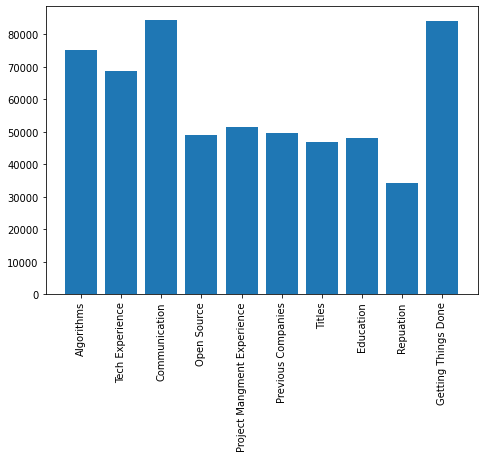

<Figure size 1440x720 with 0 Axes>

In [128]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Well,values)
ax.tick_params(axis='x', rotation=90)
plt.figure(figsize=(20,10))
plt.show()

Going by the result it seems that when hiring skills and attitude are valued a lot higher than titles or education. One thing to keep in mind that this the opinion of newish engineer. The age range of StackoverFlow respondent is between [25-30](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fheesoo37%2Fstack-overflow-2018-survey-age-gender-sexuality) so there might be a bais at play.

## Question 2: Question 2: What did survey participants Regard as an important factor when choosing a company to work for?

Following the same steps as the previous question.

In [129]:
# Columns name
seekers_priority_columns = ['AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 'AssessJobLeaders',
 'AssessJobProfDevel',
 'AssessJobDiversity',
 'AssessJobProduct',
 'AssessJobFinances']

In [136]:
Names = ['Job Industry',
        ' Role',
        'Experience',
        'Department',
        'Technology',
         'Projects',
         'Compesnation',
         'Office',
         'Commute',
         'Remote',
         'Leaders',
         'Professional Development',
         'Diversity',
         'Job Product',
         'Finances'
        ]

In [130]:
# get the columns of intrest
seekers_priority = df[df.columns.intersection(seekers_priority_columns)]
seekers_priority.head()

,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances
0,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat important,Somewhat important,Somewhat important,Important,Important,Very important,Important,Very important,Important,Somewhat important,Not very important,Very important,Important,Very important,Very important
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
#drop nulls
seekers_priority = seekers_priority.dropna()

In [132]:
# Encode Values
for column in seekers_priority.columns:
    seekers_priority[column] = seekers_priority[column].map(encode_interest)

In [133]:
seekers_priority.head()

,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances
0,4,4,3,4,4,4,3,4,4,4,4,4,2,1,2
3,2,2,2,3,3,4,3,4,3,2,1,4,3,4,4
5,3,2,3,3,2,2,3,2,3,2,0,2,2,2,1
6,2,4,1,3,3,4,3,3,3,4,4,4,2,1,4
7,1,3,2,3,3,3,3,2,3,2,2,3,1,2,1


In [134]:
S_values = list()
for col in seekers_priority.columns:
    S_values.append(sum(seekers_priority[col]))

In [135]:
S_values

[49584,
 52786,
 53589,
 53361,
 62317,
 58901,
 64081,
 62295,
 60679,
 50279,
 47195,
 66816,
 41387,
 50842,
 52417]

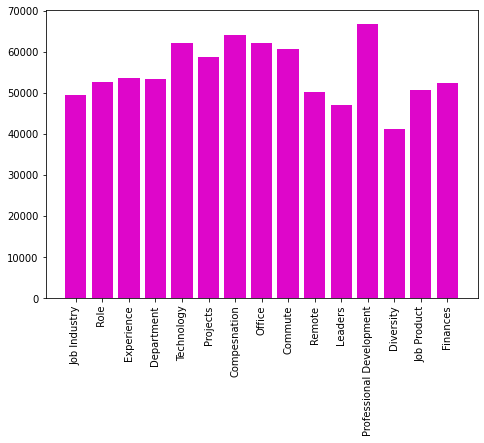

<Figure size 1440x720 with 0 Axes>

In [137]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Names,S_values,color = '#DE06CA')
ax.tick_params(axis='x', rotation=90)
plt.figure(figsize=(20,10))
plt.show()

<AxesSubplot:>

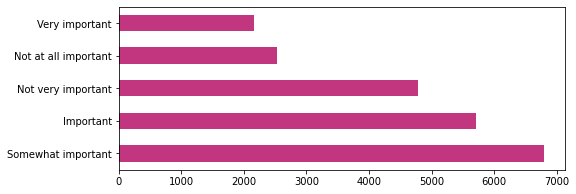

In [138]:
Diversity = df['AssessJobDiversity']
Diversity.value_counts().plot(kind='barh', figsize=(8,3), color="#C23680")

It seems from this that respondents value personal reasons over the what happens in their company. Compensation, Professional developments and the office are the most valued factors in choosing a company. However a flaw in my method is that some things like diversity where it is considered really important by some groups but don't get similar representaion due to the demographic of respondents.  

## Qustion 3: Compensation and benefits other than base salary that are important to respondents?

This one was really annoying to deal thankfully a similar question to it was solved in the course so I just repurposed the steps to solve this question

1. I got all unique Values from ImportantBenefits column and tried to see what are benefits.

In [139]:
# List of unique Values
list(df['ImportantBenefits'].unique())

['Stock options; Vacation/days off; Remote options',
 nan,
 'Stock options; Annual bonus; Health benefits; Equipment; Private office',
 'Vacation/days off; Expected work hours',
 'Health benefits; Equipment; Professional development sponsorship; Education sponsorship; Remote options',
 'Equipment; Professional development sponsorship; Expected work hours; Remote options',
 'Stock options; Annual bonus; Health benefits; Equipment; Remote options',
 'Vacation/days off; Long-term leave; Expected work hours; Remote options; Child/elder care',
 'Vacation/days off; Health benefits; Professional development sponsorship; Expected work hours; Remote options',
 'Retirement; Vacation/days off; Equipment; Professional development sponsorship; Expected work hours',
 'Stock options; Vacation/days off; Equipment; Professional development sponsorship; Remote options',
 'Equipment; Private office; Expected work hours; Remote options; Meals',
 'Vacation/days off; Health benefits; Expected work hours; Re

In [140]:
possible_vals=['Vacation/days off',
               'Expected work hours'
               ,'Professional development sponsorship'
               ,'Remote options'
               ,'Meals'
               ,'Health benefits'
               ,'Annual bonus'
               ,'Stock options'
               ,'Retirement'
               ,'Child/elder care'
               ,'Equipment'
               ,'Charitable match'
               ,'Private office'
               ,'Long-term leave']

I used this function that was provided in the course 

In [141]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


In [142]:
Benefit = df['ImportantBenefits'].value_counts().reset_index()
Benefit.rename(columns={'index': 'benefit', 'ImportantBenefits': 'count'}, inplace=True)

In [145]:
Benefit = total_count(Benefit, 'benefit', 'count', possible_vals)

In [147]:
Benefit.set_index('benefit', inplace=True)

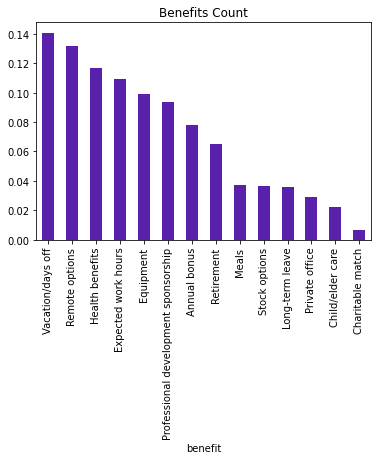

In [151]:
(Benefit/Benefit.sum()).plot(kind='bar', legend=None,color = '#5920AB');
plt.title('Benefits Count');
plt.show()

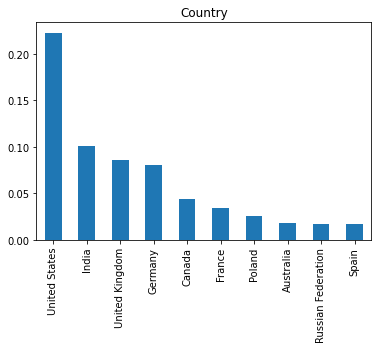

In [156]:
count_vals = df.Country.value_counts()


(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

This one is more straight forward than the previous two questions. Comfort and compenstion seem to be the most important ones. Vaction. However this might be heavily scewed due to the fact that most respondent are in the US. Which something that wasn't taken into acoount when this analysis was done. Child/elder care are one of the lowest. This might be attributed to the fact that most particpents are quite [young](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fheesoo37%2Fstack-overflow-2018-survey-age-gender-sexuality).